# HOMEWORK 2 - CONSTRUCTING AND ANALYZING LAPLACE TRANSFORMS FOR REACTION NETWORKS

In this homework, you will construct a Laplace transform for a reaction network and predict its response to initial conditions.

The reaction network you will analyze is:

$S_1 \xrightarrow[\text{}]{k_1 S_1} S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_2} S_3$,
$S_3 \xrightarrow[\text{}]{k_3 S_3} S_2$,

In your computational studies, use $k_1 = 1$, $k_2 = 2$, $k_3 = 2.5$.
The initial conditions for $S_1 = 5$; all other species are initialized to 0.

You should submit your homework as a collab notebook with a separate section for each question.

**Questions**
1. (1 pt) Write Antimony code for the reaction network and simulate it under initial conditions.
1. (5 pt) Find the transfer function $G(s) = \frac{S_3(s)}{S_1 (s)}$. Show steps: (a) construct system equations; (b) convert to Laplace Transforms; and (c) calculate the transfer function.
You will get two points extra credit if you submit your work in LaTex.
1. (1 pt) What are the poles of $G(s)$? Is the system stable? Does it oscillate?
1. (3 pt) We can interpret the simulation in (1) as a response of the transfer function
to the input signal $S_1 (s) = \frac{5}{s + k_1}$. Show that the predicted value of $S_3$ at time
$\infty$ (the "final value") is consistent with the simulation in (1). (Hint: The final value of the Laplace transform $G(s)$
is $lim_{s\rightarrow 0} s G(s)$.) Why is the final value less than the initial value of $S_1$?

# Preliminaries

In [ ]:
!pip -q install controlSBML
import controlSBML as ctl
import control
from controlSBML.util import makeSimulationTimes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import tellurium as te
import sympy
print("controlSBML version: " + ctl.__version__)


# Original packages included 
    # !pip install -q tellurium
    # import pandas as pd
    # import matplotlib.pyplot as plt
    # import numpy as np
    # import tellurium as te


controlSBML version: 0.2.12


# Helpful Hints

## LaTex Basics

1. All LaTex appears between dollar signs (``$``)
1. Subscripts: $x_2$
1. Superscript: $x^2$
1. Summation: $\sum_{n=0}^{\infty} e^{nt}$
1. Derivatives: $\dot{x}(t)$
1. Bold: ${\bf A}$
1. Fractions: $\frac{a}{b}$

## Steps in Constructing Laplace Transforms
1. Specify the input and output for the transfer function.
1. Write the system equations.
1. Convert to Laplace transforms.
1. Solve for the output LT in terms of the input LT and form the ratio.

# Q1: Write Antimony Code for the Reaction Network

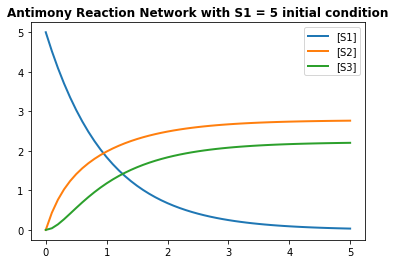

2.202970872553076 is the approximate final value of S3


In [ ]:
MODEL = """
J1: S1 -> S2; k1*S1
J2: S2 -> S3; k2*S2
J3: S3 -> S2; k3*S3

k1 = 1
k2 = 2
k3 = 2.5
S1 = 5
S2 = 0
S3 = 0
"""
MODEL_RR = te.loada(MODEL)
MODEL_DATA = MODEL_RR.simulate()
MODEL_RR.plot(title="Antimony Reaction Network with S1 = 5 initial condition")
FINALVALUE= MODEL_DATA[50, 3]
print(str(FINALVALUE) + " is the approximate final value of S3")

# Q2: Derive the transfer function $\frac{S_3(s)}{S_1(s)}$

(A) Construct system equations

\begin{align}
\dot{S_1} & = -k_1S_1 \\
\dot{S_2} & = k_1S_1 - k_2S_2 +k_3S_3 \\
\dot{S_3} & = k_2S_2 - k_3S_3 \\
\end{align}


(B) Convert to Laplace transforms

\begin{align}
s S_1(s) & = -k_1S_1(s) \\
sS_2 (s) & = k_1S_1(s) - k_2S_2(s) + k_3S_3(s) \\
s S_3(s) & = k_2S_2(s) - k_3S_3(s) \\
\end{align}

(C) Calculate the transfer function: $\frac{S_3(s)}{S_1(s)}$


\begin{align}
s\underline{S_2(s)} + k_2\underline{S_2(s)} & =k_1S_1(s) + k_3S_3(s) \\\\
S_2(s)[s + k_2] & = k_1S_1(s) + k_3S_3(s) \\\\
S_2(s) & = \frac{k_1S_1(s) + k_3S_3(s)}{(s + k_2)} \\\\
sS_3(s) & = k_2[\frac{k_1S_1(s) + k_3S_3(s)}{(s + k_2)}] - k_3S_3(s) \\
sS_3(s) + k_3S_3(s) & = \frac{k_1k_2S_1(s)}{(s + k_2)} + \frac{k_2k_3S_3(s)}{(s + k_2)} \\
s\underline{S_3(s)} + k_3\underline{S_3(s)} - \frac{k_2k_3}{(s + k_2)}\underline{S_3(s)} & = \frac{k_1k_2}{(s + k_2)} S_1(s) \\
\underline{S_3(s)}[s + k_3 - \frac{k_2k_3}{(s + k_2)}] & = \frac{k_1k_2}{(s + k_2)} S_1(s) \\
S_3(s)[\frac{(s+k_2)}{(s+k_2)}s + \frac{(s+k_2)}{(s+k_2)}k_3 - \frac{k_2k_3}{(s + k_2)}] & = \frac{k_1k_2}{(s + k_2)} S_1(s) \\
S_3(s)[\frac{s^2+k_2s + k_3s + k_2k_3 - k_2k_3}{(s+k_2)}] & = \frac{k_1k_2}{(s + k_2)} S_1(s) \\\\
\frac{S_3(s)}{S_1(s)} & = \frac{k_1k_2}{(s + k_2)} [\frac{(s+k_2)}{s^2+(k_2 + k_3)s}] \\\\
\frac{S_3(s)}{S_1(s)} & = \frac{k_1k_2}{s^2+(k_2 + k_3)s} \\
\end{align}


# Q3: Poles of the Transfer Function

$\frac{S_3(s)}{S_1(s)} = \frac{k_1k_2}{s[s+ (k_2 + k_3)]}$

We see that the poles are $s = 0$ and $s = -(k_2+k_3)$. Since $k_2 = 2$ and $k_3 = 2.5$, the second pole is $s = -4.5$.

With these poles, the system would be stable since one of them is negative while the other is zero. In the time domain, this is a constant term and an exponential decay, so we would not see unbounded growth. 

# Q4: Response to the Input Signal

Finding the final value of $S_3$:

$lim_{s\rightarrow 0} s G(s)$


\begin{align}
\frac{S_3}{S_1}  = & \frac{k_1k_2}{s(s + k_2+k_3)}\\
\frac{S_3}{S_1}  = & \frac{k_1k_2}{s(s + k_2+k_3)} \cdot \mathbf s \\
\frac{S_3}{S_1}  = & \frac{k_1k_2}{(s + k_2+k_3)}\\
S_3 = & \frac{k_1k_2}{(s + k_2+k_3)} \cdot S1 \\
S_3 = & \frac{k_1k_2}{(s + k_2+k_3)} \cdot \frac{5}{s + k_1} \\\\
k_1 =1, k_2 =2, k_3 =2.5 \\\\
S_3 = & \frac{2}{(s + 4.5)} \cdot \frac{5}{s + 1} \\\\
lim_{s\rightarrow 0} S_3 = & \frac{10}{4.5} ≈ 2.2 \\\\
\end{align}

This value matches that approached by $S_3$ in the original simulation. 

Intuitively, the final value of $S_3$ is less than the initial value of $S_1$ because the mass of the system near the end of the reaction is distributed between $S_3$ and $S_2$. 

From the point of view of transfer function analysis, the DC gain tells us how the input affects the output. Taking the DC gain of this system, it comes out to be infinity. This makes sense because one of our poles is 0, which is a constant in the time domain. The step response is the final value of the output after a unit step, which is applying a constant shove to the system. If we constantly apply a constant to our system, it's going to approach infinity with this test. I would expect for the DC gain to be < 0 since S3 is less than S1 in the end, but the 0 pole could make this system more complicated to analyze. 





/usr/local/lib/python3.7/dist-packages/control/timeresp.py:924: UserWarning:

Non-zero initial condition given for transfer function system. Internal conversion to state space used; may not be consistent with given X0.



inf

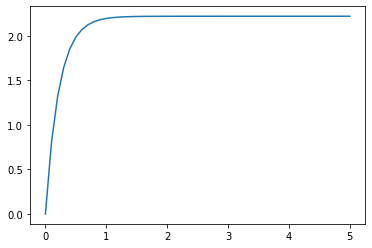

In [ ]:
# Finding the final value with the control package
k1 = 1
k2 = 2
k3 = 2.5
tf = control.TransferFunction([k1*k2],[1,k2+k3,0])
tf
TIMES = np.linspace(0,5,51)
TIMES
result = control.forced_response(tf, T = TIMES, X0 =  [5,0])
result.outputs

plt.plot(result.t.flatten(), result.outputs.flatten())